In [1]:
# importing libraries
%matplotlib inline

import numpy as np # package for math operations
import pandas as pd
import matplotlib.pyplot as plt # package for plotting
from IPython.display import Image
from sklearn import preprocessing, model_selection, linear_model

In [2]:
# setting up variables for later computation
rand_state = 2
test_size = 0.3

# set random seed
np.random.seed(rand_state)

Create function to generate toy data as a circle:

In [3]:
# function to generate some toy data for classification
def generate_toy_data(test_size, rand_state):
    data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=200)
    data = np.hstack((data, np.zeros((200, 1))))
    data[data[:, 0]**2 + data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], 
                                                                     len(data[data[:, 0]**2 + data[:, 1]**2 < 3**2]), 
                                                                     p=[0.2, 0.8])
    X = data[:, :-1]
    y = data[:, -1]
    
    # train test split
    return model_selection.train_test_split(X, y, test_size=test_size, random_state=rand_state)

This creates a function to draw the decision boundary. To be completely honest, I just copied it and did not pay more attention to it.

In [9]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='blue')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='red', alpha=0.3)
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Blues')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
    return ax

Generate the data and plot it.

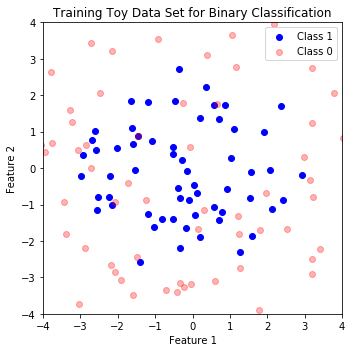

In [10]:
# generate more complicated toy data
X_train, X_test, y_train, y_test = generate_toy_data(test_size, rand_state)

# plot data and decision boundary of logistic regression
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# plot class 1
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', label='Class 1')
# plot class 0
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', label='Class 0', alpha=0.3)
# label axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
# label title
ax.set_title('Training Toy Data Set for Binary Classification')
# add legend
ax.legend()
# add x, y limits
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])

plt.tight_layout()
plt.show()

---

A simple non-linear boundary is a quadratic decision boundary. It is defined by the equation
$$
\mathbf{w}^\top \mathbf{x}_{\text{poly}} = w_0 + w_{11}x_1 + w_{12}x^2_1 + \ldots + w_{D1}x_D + w_{D2} x^2_D = 0
$$
where $\mathbf{x}_{\text{poly}} = [1, x_1, x^2_1, \ldots, x_D, x^2_D]$.

What the above is saying is that a quadratic equation in $\mathbf{x}$ is **secretly a linear equation** in the transformed vector $\mathbf{x}_{\text{poly}}$.

Computing p-powers of the features:
$$
\begin{aligned}
\mathbb{R}^D &\to \mathbb{R}^{D\cdot p}\\
[x_1, \ldots, x_D] &\rightarrow [x_1, x^2_1\ldots, x^p_1, \ldots, x_D, x^2_D\ldots, x^p_D]
\end{aligned}
$$

---

Let's solve this problem!!

0. The first step is to generate the data, but we have already done so! You already have `X_train`, `X_test`, `y_train`, `y_test` defined above.

1. The second step is to preprocess the features, and in particular, polynomial features! Sound familiar? Yes, we have already done this for polynomial regression.

If you don't remember how to generate polynomial features, you should use `preprocessing.PolynomialFeatures(degree=2)`. 

The previous call creates a preprocessor object. We need to fit and transform the features, so you should use `fit_transform()` method on the training features, `X_train` and `fit()` on the `X_test` features. Review polynomial linear regression from previous days if you need to refresh, or search the online documentation if needed.

2. Now, create a logistic classifier and fit the transformed training features. To create the classifier, use `logreg = linear_model.LogisticRegression(C=1., solver='lbfgs)`. 

3. Once you have trained the logistic classifier, we can evaluate its performance and draw its decision boundary. We will give you the code for this.

### Implement steps 1 and 2 from previous list

In [11]:
# create polynomial features



In [12]:
# fit our logistic regression model with non-linear decision boundary



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Run the following code to evaluate and draw a decision boundary

We will do the evaluation for you. Just remember that `sklearn` models have a `score` method that will measure performance of the model (accuracy in this case).

In [13]:
# evaluate model
scores_df = pd.DataFrame(data={'logistic regression': [logreg.score(X_train_quad, y_train), logreg.score(X_test_quad, y_test)]}, 
                         index=['train score', 'test score'])
scores_df.head()

,logistic regression
train score,0.842857
test score,0.850000


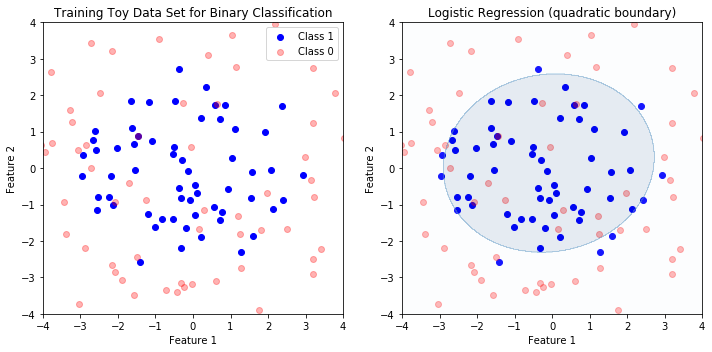

In [14]:
# plot data and decision boundary of logistic regression
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# plot class 1
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', label='Class 1')
# plot class 0
ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', label='Class 0', alpha=0.3)
# label axes
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
# label title
ax[0].set_title('Training Toy Data Set for Binary Classification')
# add legend
ax[0].legend()
# set x, y limits
ax[0].set_xlim([-4, 4])
ax[0].set_ylim([-4, 4])

# plot decision boundary
ax[1] = plot_decision_boundary(X_train, y_train, logreg, 
                               'Logistic Regression (quadratic boundary)', 
                               ax[1], bounds=(-6, 7), poly_flag=True)
# set x, y limits
ax[1].set_xlim([-4, 4])
ax[1].set_ylim([-4, 4])

plt.tight_layout()
plt.show()